#  Confidence Interval

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem,t
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import os

In [2]:
df = pd.read_csv("C:/Users/raish/Downloads/loans_income.csv")
df.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


#  The Bootstrap

In [3]:
loans_income = np.array(pd.read_csv("C:/Users/raish/Downloads/loans_income.csv"))

In [5]:
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]], dtype=int64)

In [6]:
loans_income = np.array([item for sublist in loans_income for item in sublist])

In [7]:
loans_income

array([ 67000,  52000, 100000, ...,  50000,  82000,  70000], dtype=int64)

In [13]:
def bootstrap(l,R):
    n = len(loans_income)
    # Number of Bootstrap Samples
    means_of_boot_sample = []
    for reps in range(R):
        #Step 1,2
        boot_sample = np.random.choice(loans_income, size = n)
        #step3
        means_of_boot_sample.append(round(np.mean(boot_sample),3))
    return means_of_boot_sample

bootstrap(loans_income, 5)

[68761.089, 68586.923, 68965.082, 68850.395, 68935.157]

#  Standard deviation


In [15]:
np.std(bootstrap(loans_income,100))

152.54552010597376

#  Plotting Box Plot and Histogram 

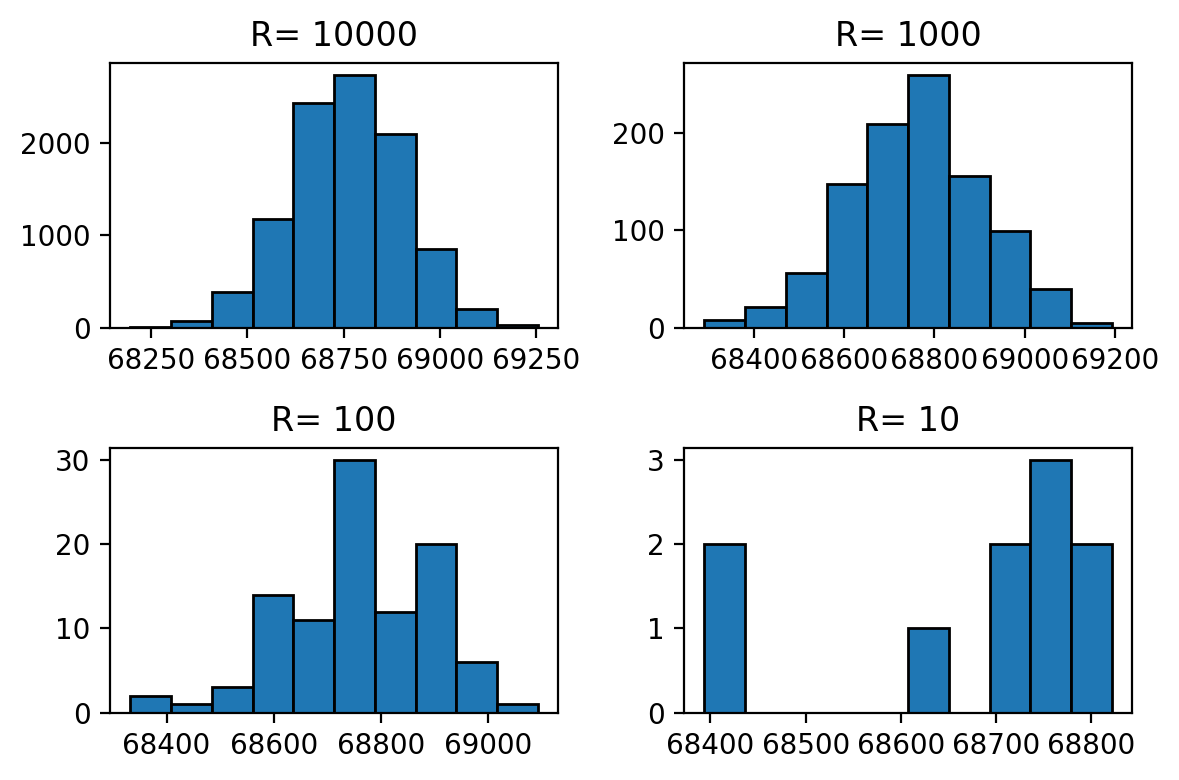

In [17]:
plt.figure(dpi=200)

plt.subplot(221)
plt.title("R= 10000")
plt.hist(bootstrap(loans_income, 10000), edgecolor = 'k')

plt.subplot(222)
plt.title("R= 1000")
plt.hist(bootstrap(loans_income, 1000), edgecolor = 'k')

plt.subplot(223)
plt.title("R= 100")
plt.hist(bootstrap(loans_income, 100), edgecolor = 'k')

plt.subplot(224)
plt.title("R= 10")
plt.hist(bootstrap(loans_income, 10), edgecolor = 'k')

plt.tight_layout()

# Confidence Interval

In [19]:
data = bootstrap(loans_income, 1000)
lower_lim, upper_lim = np.percentile(data,2.5), np.percentile(loans_income,95)
print("lower Limit:  ",lower_lim)
print("upper limit:  ",upper_lim)

lower Limit:   68474.91562500001
upper limit:   134607.39999999935


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'95% Confidence interval of loan applicants based on sample of 1000 means'}, ylabel='Density'>

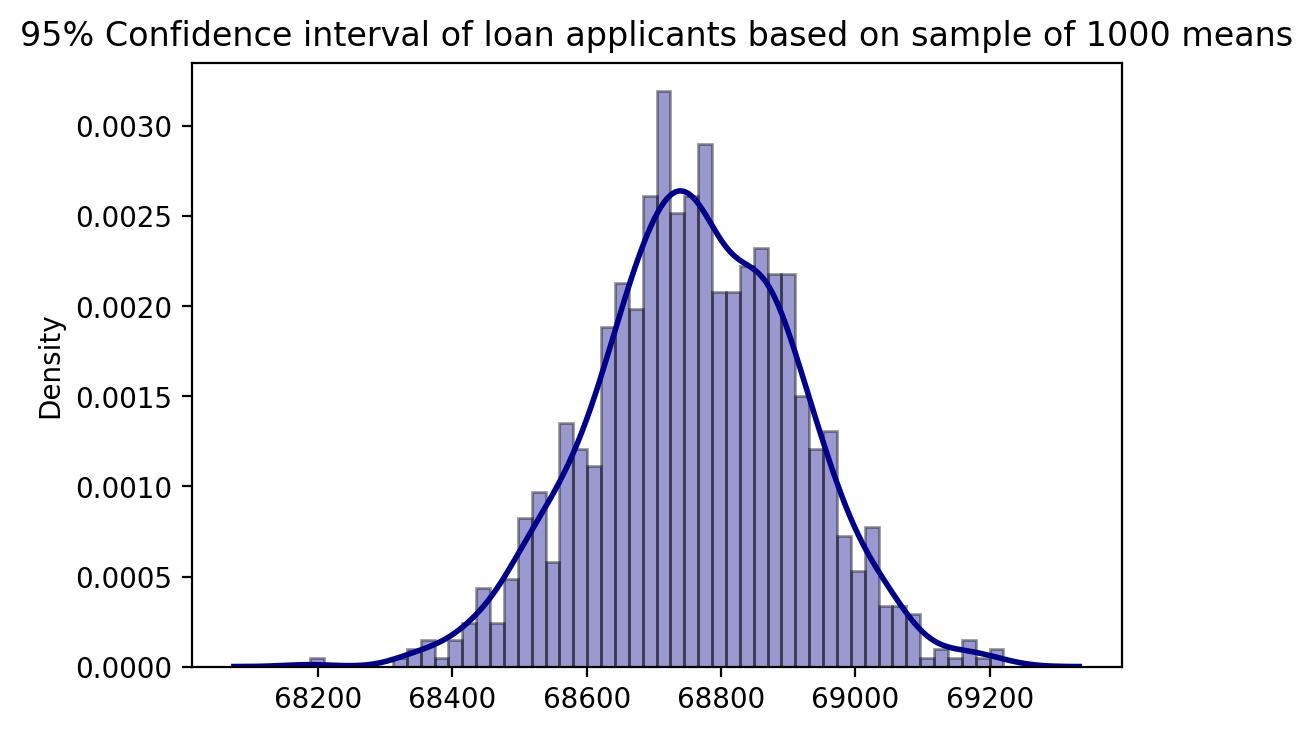

In [25]:
plt.figure(dpi = 200)
plt.title("95% Confidence interval of loan applicants based on sample of 1000 means")

sns.distplot(bootstrap(loans_income,1000), hist = True, kde=True,
            color = 'darkblue',bins = 50,
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':2})


plt.axvline(x=lower_lim,color='red')
plt.axvline(x=upper_lim,color='red')